In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
data = pd.read_csv("Loan_Data.csv")

In [22]:
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [9]:
pd.isna(data).sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [14]:
data.corr()["default"]

customer_id                 0.006927
credit_lines_outstanding    0.862815
loan_amt_outstanding        0.098978
total_debt_outstanding      0.758868
income                      0.016309
years_employed             -0.284506
fico_score                 -0.324515
default                     1.000000
Name: default, dtype: float64

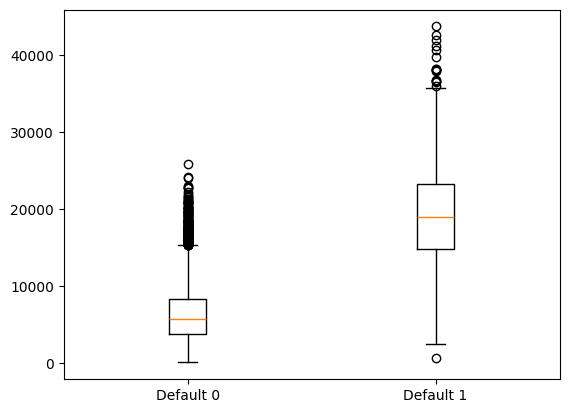

In [67]:
data_default_0 = data[data['default'] == 0]['total_debt_outstanding']
data_default_1 = data[data['default'] == 1]['total_debt_outstanding']
plt.boxplot([data_default_0, data_default_1], labels=['Default 0', 'Default 1']);

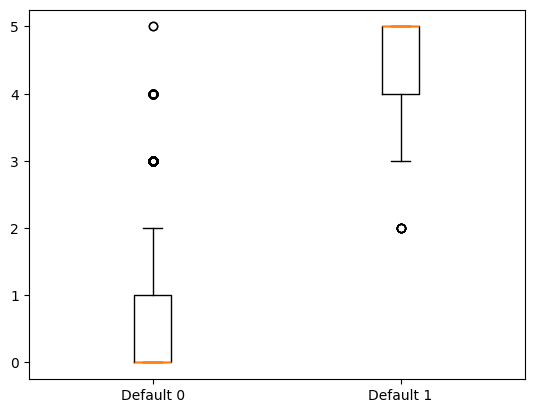

In [68]:
data_default_0 = data[data['default'] == 0]['credit_lines_outstanding']
data_default_1 = data[data['default'] == 1]['credit_lines_outstanding']
plt.boxplot([data_default_0, data_default_1], labels=['Default 0', 'Default 1']);


### Results show:
1. credit_lines_outstanding, total_debt_outstanding are significant factors which may predict default risk
2. Higher the fico score, years employed, lower is the chance of default


In [78]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=50)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.984


#### For Loss:
Considering if a loan defaults, the 90% of total debt + loan amount outstanding is not paid resulting in loss

In [84]:
prob_default = model.predict_proba(X_test)
probs = [prob[0] for prob in prob_default]

df = pd.DataFrame({
    "prob" : probs,
    "default": y_pred,
    "Loss": (X_test.loan_amt_outstanding + X_test.total_debt_outstanding) * 0.9
})

df[df.default==1]

,prob,default,Loss
4161,7.756462e-11,1,34432.074432
8770,8.353141e-02,1,13654.513926
2884,3.092587e-04,1,21600.788723
102,3.573439e-09,1,32249.371960
7294,1.737555e-06,1,25960.008679
...,...,...,...
5301,5.713105e-02,1,13378.738442
5490,1.842777e-03,1,21871.636723
4073,9.447269e-04,1,27272.851391
6755,2.857263e-03,1,17293.836253


In [88]:
print("Total loss if 380 loans default: ", round(sum(df.Loss), 2))

Total loss if 380 loans default:  23373982.5
